<a href="https://colab.research.google.com/github/2303A52231/2303A52231/blob/main/2303A52231_SML_PROJECT_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
d= pd.read_csv('/content/A-7.csv')
#print(d)
d=d.dropna()
print(d)

    x1   x2   x3   x4     y
0  1.2  2.3  3.1  4.2  15.6
1  2.4  1.9  2.8  3.5  13.1
2  3.5  2.7  1.5  2.9  12.4
3  4.1  3.0  3.6  4.8  18.2
4  1.9  2.8  2.5  3.2  14.1
5  3.7  2.5  1.9  4.0  16.0
6  2.1  3.2  2.2  4.1  14.5
7  3.3  2.4  3.0  4.5  17.3
8  2.8  3.1  1.8  3.6  14.9
9  4.0  3.3  2.7  4.9  19.2


In [4]:
y=d['y']
y=y.dropna()
print(y)

0    15.6
1    13.1
2    12.4
3    18.2
4    14.1
5    16.0
6    14.5
7    17.3
8    14.9
9    19.2
Name: y, dtype: float64


In [7]:
x=d.drop('y',axis=1)
x=x.dropna()
print(x)

    x1   x2   x3   x4
0  1.2  2.3  3.1  4.2
1  2.4  1.9  2.8  3.5
2  3.5  2.7  1.5  2.9
3  4.1  3.0  3.6  4.8
4  1.9  2.8  2.5  3.2
5  3.7  2.5  1.9  4.0
6  2.1  3.2  2.2  4.1
7  3.3  2.4  3.0  4.5
8  2.8  3.1  1.8  3.6
9  4.0  3.3  2.7  4.9


Text(0.5, 1.0, 'Exchange of rates')

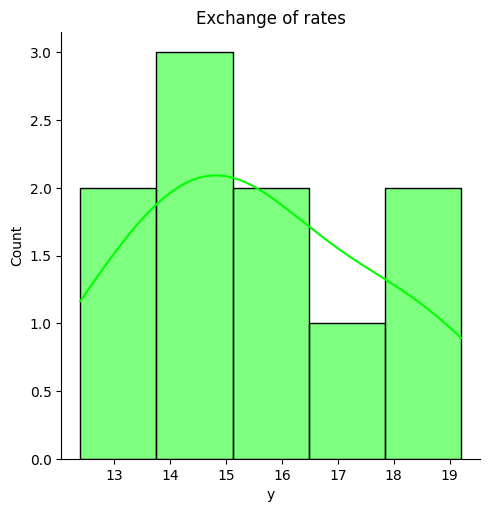

In [9]:
import seaborn as sns
sns.displot(d.y,kde=True,color='lime')
plt.title("Exchange of rates")

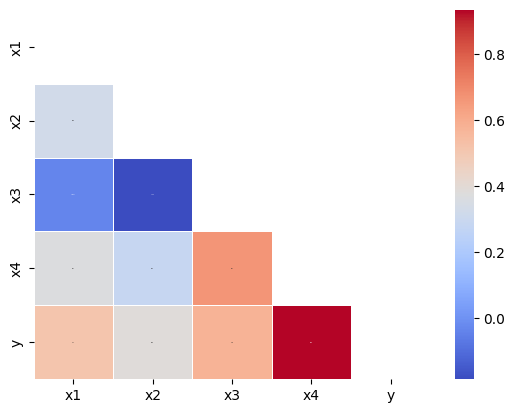

In [10]:
d = d.replace('ND', np.nan)
d = d.apply(pd.to_numeric, errors='coerce')
matrix = np.triu(d.corr())
sns.heatmap(d.corr(), annot=True, cmap='coolwarm', mask=matrix, annot_kws={'size':1}, linewidth=0.5,linecolor='white')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


# Assuming 'd' is your DataFrame
# First, split the data into train and test sets
# Change test_size to a float between 0 and 1 or an integer less than 10
train, test = train_test_split(d, test_size=0.2)  # Using 20% of the data for testing
# Alternatively, you can use an integer:
# train, test = train_test_split(d, test_size=2)  # Using 2 samples for testing


# Now you can access train and test
x_train = train.iloc[:, :20]
x_train = x_train.dropna()
x_test = test.iloc[:, :20]
x_test = x_test.dropna()
y_train = train['y']
y_train = y_train.dropna()
y_test = test['y']
y_test = y_test.dropna()

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Convert the Series to a NumPy array using .values and then reshape
y_train = y_train.values.reshape(-1, 1)
y_train = imputer.fit_transform(y_train).ravel()


print(x_train.shape)
print(y_train.shape)


min_samples = min(x_train.shape[0], y_train.shape[0])
x_train = x_train[:min_samples]
y_train = y_train[:min_samples]

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

(8, 5)
(8,)


LinearRegression()

In [16]:
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(x_train, y_train)

SVR()

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)



print(x_train.shape)
print(y_train.shape)


min_samples = min(x_train.shape[0], y_train.shape[0])
x_train = x_train[:min_samples]
y_train = y_train[:min_samples]

model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

from sklearn.svm import SVR
model_svr = SVR()


model_svr.fit(x_train, y_train)

y_pred_train = model_svr.predict(x_train)

min_samples_test = min(x_test.shape[0], y_test.shape[0])
x_test = x_test[:min_samples_test]
y_test = y_test[:min_samples_test]

y_pred_test= model_svr.predict(x_test)

print(f'train data MSE score SVR: {mean_squared_error(y_train,y_pred_train )}')
print(f'train data MAE score SVR: {mean_absolute_error(y_train, y_pred_train)}')
print(f'train data RMSE score SVR: {root_mean_squared_error(y_train,y_pred_train )}')



print()
print(f'test data MSE score SVR: {mean_squared_error(y_test, y_pred_test)}')
print(f'test data MAE score SVR: {mean_absolute_error(y_test, y_pred_test)}')
print(f'test data RMSE score SVR: {root_mean_squared_error(y_test, y_pred_test)}')
print()

(8, 5)
(8,)
train data MSE score SVR: 2.938477086327077
train data MAE score SVR: 1.3012747198570038
train data RMSE score SVR: 1.7141986717784718

test data MSE score SVR: 4.3705634004763105
test data MAE score SVR: 1.901060965452766
test data RMSE score SVR: 2.090589247192358



In [18]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(alpha=1.0)
model_lasso.fit(x_train, y_train)

Lasso()

In [19]:
from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(alpha=1.0)
model_lasso.fit(x_train, y_train)

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_train, y_train)


y_pred_lasso = model_lasso.predict(x_test)
y_pred_ridge = model_ridge.predict(x_test)

y_pred_lasso1 = model_lasso.predict(x_train)
y_pred_ridge1 = model_ridge.predict(x_train)

print(f'test data MSE score lasso: {mean_squared_error(y_test,y_pred_lasso)}')
print(f'test data MAE score lasso: {mean_absolute_error(y_test, y_pred_lasso)}')
print(f'test data RMSE score lasso: {root_mean_squared_error(y_test, y_pred_lasso)}')
print()
print(f'train data MSE score lasso: {mean_squared_error(y_train,y_pred_lasso1)}')
print(f'train data MAE score lasso: {mean_absolute_error(y_train,y_pred_lasso1 )}')
print(f'train data RMSE score lasso: {root_mean_squared_error(y_train,y_pred_lasso1)}')
print()

test data MSE score lasso: 0.270914712946024
test data MAE score lasso: 0.45403607707045524
test data RMSE score lasso: 0.5204946809968609

train data MSE score lasso: 0.23135596283844884
train data MAE score lasso: 0.38679825037053117
train data RMSE score lasso: 0.480994763836831



In [20]:
from sklearn.linear_model import Lasso, Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x_train, y_train)

Ridge()

In [21]:
print(f'train data MSE score ridge: {mean_squared_error(y_train,y_pred_ridge1)}')
print(f'train data MAE score ridge: {mean_absolute_error(y_train,y_pred_ridge1 )}')
print(f'train data RMSE score ridge: {root_mean_squared_error(y_train,y_pred_ridge1)}')
print()
print(f'test data MSE score ridge: {mean_squared_error(y_test,y_pred_ridge)}')
print(f'test data MAE score ridge: {mean_absolute_error(y_test,y_pred_ridge )}')
print(f'test data RMSE score ridge: {root_mean_squared_error(y_test,y_pred_ridge)}')
print()

train data MSE score ridge: 0.00514819399578771
train data MAE score ridge: 0.06786094235093554
train data RMSE score ridge: 0.07175091634110124

test data MSE score ridge: 0.005855458700793601
test data MAE score ridge: 0.0765147128089474
test data RMSE score ridge: 0.07652096902675502

